### IMPORT MODULES AND DATASET

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
bank = pd.read_csv('bank-full.csv', delimiter=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [251]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [252]:
bank.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [253]:
bank.duplicated().sum()

0

### EXPLORE DATASET

Text(0.5, 1.0, 'Age Distribution of Customers')

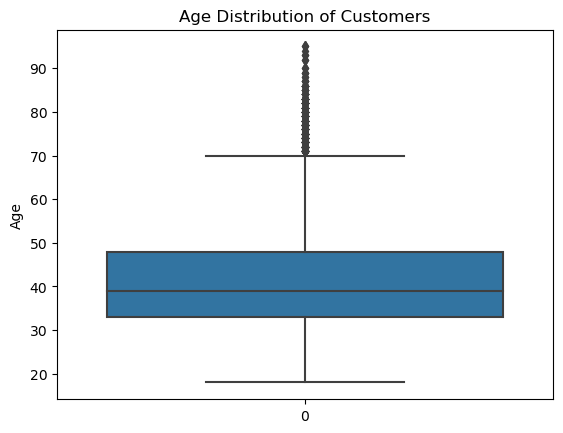

In [254]:
# check for outliers
sns.boxplot(bank['age'])
plt.ylabel('Age')
plt.title('Age Distribution of Customers')

In [255]:
# find IQR
percentile25 = bank['age'].quantile(0.25)
percentile75= bank['age'].quantile(0.75)
print(percentile25)
print(percentile75)

iqr = percentile75 - percentile25
print(iqr)

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('upper limit is ', upper_limit)
print('lower limit is ', lower_limit)

33.0
48.0
15.0
upper limit is  70.5
lower limit is  10.5


In [256]:
#get the outliers
bank[bank['age'] > upper_limit]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29158,83,retired,married,primary,no,425,no,no,telephone,2,feb,912,1,-1,0,unknown,no
29261,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,-1,0,unknown,no
29263,75,retired,married,primary,no,3324,no,no,cellular,2,feb,149,1,-1,0,unknown,no
29322,83,retired,married,tertiary,no,6236,no,no,cellular,2,feb,283,2,-1,0,unknown,no
29865,75,retired,divorced,primary,no,3881,yes,no,cellular,4,feb,136,3,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45163,71,retired,married,secondary,no,2064,no,no,cellular,9,nov,379,2,92,3,failure,no
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [257]:
bank[bank['age'] < lower_limit]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [258]:
# remove outliers
bank_df = bank[bank['age'] < upper_limit]
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Text(0.5, 1.0, 'Age Distribution of Customers')

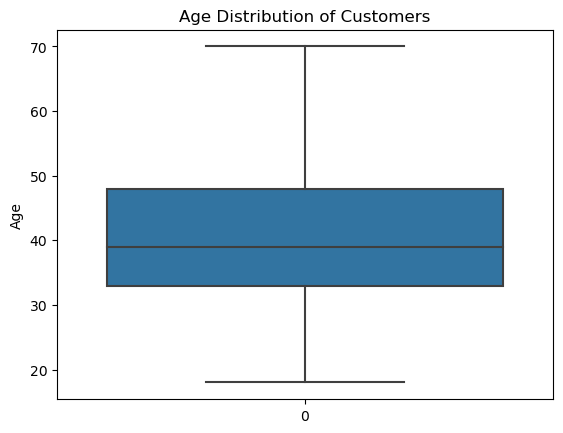

In [259]:
# check to see the differences
sns.boxplot(bank_df['age'])
plt.ylabel('Age')
plt.title('Age Distribution of Customers')

Text(0.5, 1.0, 'Age Distribution of Bank Customers')

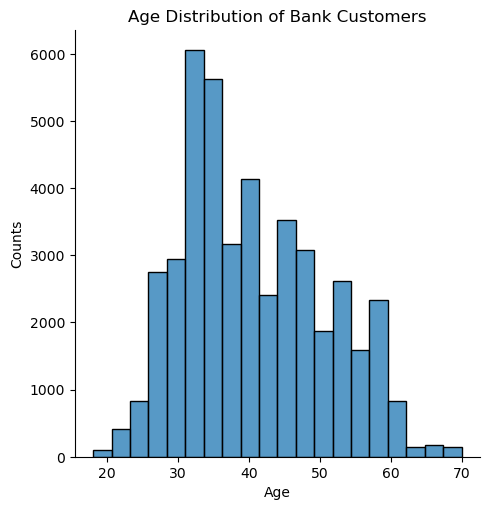

In [260]:
# How is age distributed in this dataset
sns.displot(bank_df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Age Distribution of Bank Customers')

In [261]:
sns.pairplot(bank_df, hue = 'y', markers = ['o', '^'])

In [262]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [263]:
define the features ( categorical and behavioural data) 
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan']
for f in features:
    sns.countplot(x=f, data=bank_df,palette='Set3')
    plt.xticks(rotation=90) 
    plt.show()

### DATA PREPROCESSING

In [265]:
encode = ['job', 'marital', 'education', 'default', 'housing',
       'loan']

for col in encode:
    bank_df.loc[:, col] = bank_df[col].astype('category').cat.codes

C:\Users\pc\AppData\Local\Temp\ipykernel_11884\1300588522.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df.loc[:, col] = bank_df[col].astype('category').cat.codes
C:\Users\pc\AppData\Local\Temp\ipykernel_11884\1300588522.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  bank_df.loc[:, col] = bank_df[col].astype('category').cat.codes
C:\Users\pc\AppData\Local\Temp\ipykernel_11884\1300588522.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,2,1,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,1,1,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,1,3,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,2,3,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,8,2,2,0,113,0,0,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,9,2,1,0,505,0,1,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,9,1,2,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,yes
45209,57,1,1,1,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,no


### DATA MODELLING

In [266]:
X = bank_df.drop(columns = ['contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'])
y = bank_df['y']

In [267]:
# split the dataset into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,age,job,marital,education,default,balance,housing,loan
2117,56,1,0,1,0,75,1,0
20826,38,9,2,1,0,227,0,0
4968,34,0,1,1,0,1191,1,0
831,42,1,2,0,0,19,1,0
27437,51,4,1,2,0,4,1,0
...,...,...,...,...,...,...,...,...
6265,32,0,2,1,0,13,1,0
11284,44,3,2,0,0,1059,0,0
38237,22,1,2,1,0,-51,1,0
860,33,5,1,1,0,165,0,0


In [268]:
Get the parameters for the classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(class_weight= 'balanced')
param_grid = {'max_depth': [3,4,5,6,7,8],
             'min_samples_split':[2,3,4],
             'min_samples_leaf': [1,2,3,4],
             'random_state':[0, 42]}

# performing grid search 
grid_search = GridSearchCV(dtc, param_grid, cv=5)
grid_search.fit(X_train ,y_train)
print(grid_search.best_params_)

In [269]:
# import and call the classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth= 6, min_samples_leaf = 1, min_samples_split = 2, random_state = 0)

In [270]:
# training the model
model = dtc.fit(X_train, y_train)

# testing the model
y_pred = dtc.predict(X_test)
y_pred_proba= model.predict_proba(X_test)
y_pred_proba

array([[0.93596059, 0.06403941],
       [0.91634981, 0.08365019],
       [0.78802362, 0.21197638],
       ...,
       [0.87673426, 0.12326574],
       [0.89693593, 0.10306407],
       [0.91634981, 0.08365019]])

In [271]:
# checking for overlapping datas
y_all = pd.DataFrame({'y Predicted': y_pred,
             'y Actual': y_test })
y_all

,y Predicted,y Actual
39915,no,no
44008,no,yes
21610,no,no
14500,no,no
6978,no,no
...,...,...
8910,no,no
36116,no,no
39015,no,no
35332,no,no


In [272]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
precision = precision_score(y_test, y_pred, pos_label="yes")
recall = recall_score(y_test, y_pred, pos_label="yes")
f1 = f1_score(y_test, y_pred, pos_label="yes")
accuracy = accuracy_score(y_test, y_pred)

In [273]:
metrics = {'Metric': ['Precision', 'Recall', 'F1', 'Accuracy'],
          'Score':[precision, recall, f1, accuracy]}
metrics = pd.DataFrame(metrics)
metrics

,Metric,Score
0,Precision,0.470588
1,Recall,0.007952
2,F1,0.015640
3,Accuracy,0.887423


Text(0.5, 23.52222222222222, 'Predicted Label')

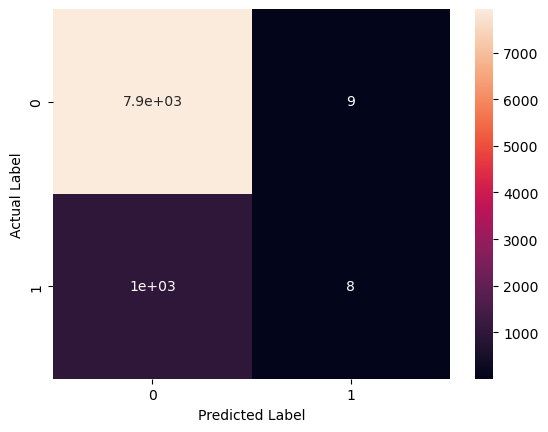

In [279]:
con_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(data= con_mat, annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [280]:
# interprete the model predictions
importance = {'Features': X_train.columns,
             'Importance': dtc.feature_importances_}
df_importance = pd.DataFrame(importance)
arranged = df_importance.sort_values(by='Importance',ascending=False)
arranged

,Features,Importance
0,age,0.362412
6,housing,0.258333
5,balance,0.213974
3,education,0.081941
7,loan,0.043072
2,marital,0.020570
1,job,0.019698
4,default,0.000000


Text(0, 0.5, 'Importance')

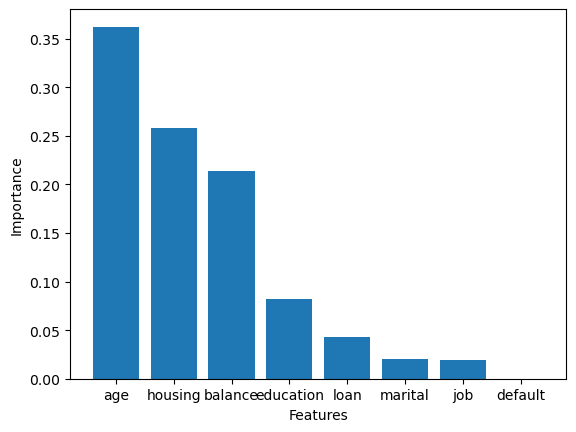

In [285]:
plt.bar(data= arranged, x='Features', height='Importance')
plt.xlabel('Features')
plt.ylabel('Importance')